In [8]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import pickle
import random

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15) 

In [9]:
file1 = open("qcd_100000_pt_1000_1200.pkl", 'rb')
data1 = pickle.load(file1)
file2 = open("higgs_100000_pt_1000_1200.pkl", 'rb')
data2 = pickle.load(file2)

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


Text(0.5,1,'Mass')

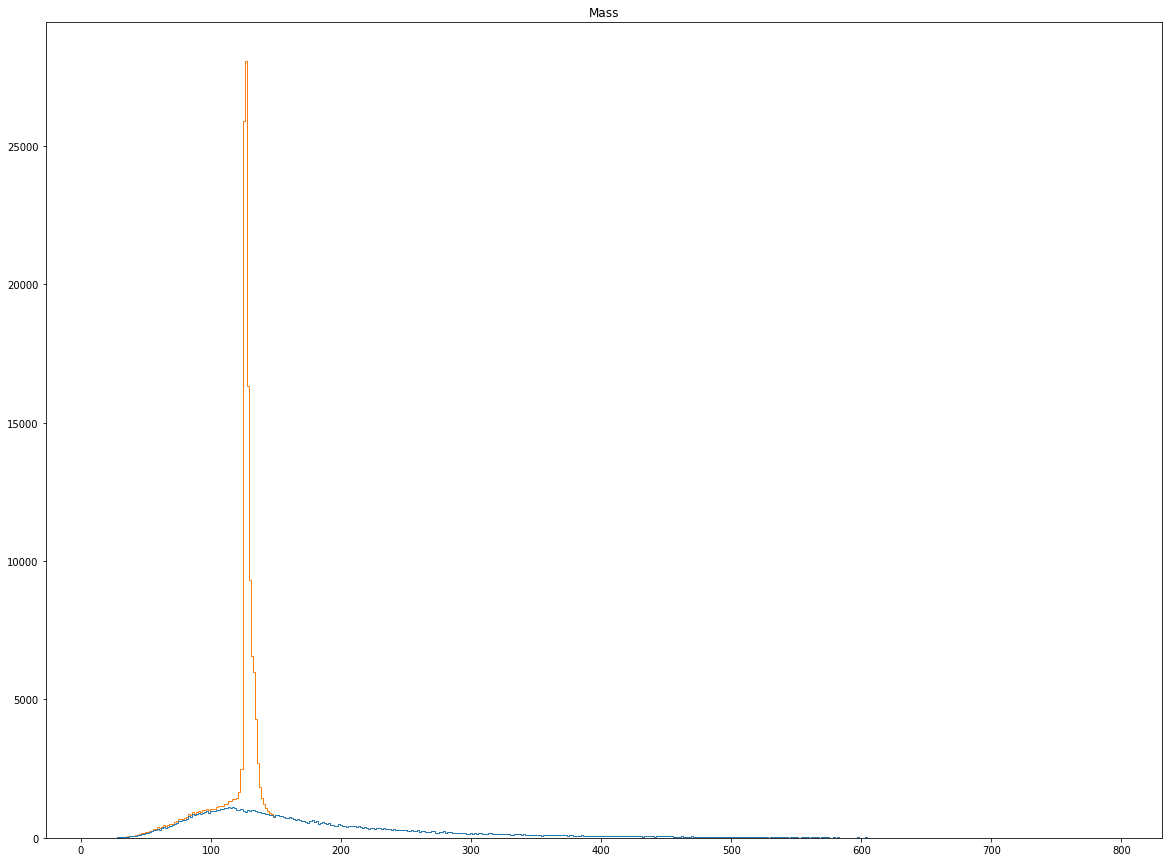

In [10]:
print(data1.keys())
x= [data1['mass'], data2['mass']]
plt.hist(x, 500, histtype="step", stacked=True, fill=False)
plt.title("Mass")

#### 2. Identify mass cuts to optimize the expected significance.
Try different mass cuts systematically

Evaluate expected significance for each set of mass cuts

Identify the set of mass cuts which give you the highest significance.

In [13]:
lam = 20000
signal = 28000

probability = stats.poisson.sf(signal, lam)
sigma = stats.norm.isf(probability)
print("The significance of a 2000 jet signal is", sigma, "sigma.")

target_sigma = 5
new_prob = stats.norm.sf(target_sigma)
target_signal = stats.poisson.isf(new_prob, lam)
print("Jets needed for 5 sigma discovery:", target_signal)

probability = stats.poisson.sf(target_signal, lam)
sigma = stats.norm.isf(probability)
print("Sigma corresponding to", target_signal, ":" , sigma)

The significance of a 2000 jet signal is inf sigma.
Jets needed for 5 sigma discovery: 20711.0
Sigma corresponding to 20711.0 : 5.002840020760749


Jets needed for 5 sigma discovery: [210.  36. 178. ...  nan 236.  32.]
Sigma corresponding to [210.  36. 178. ...  nan 236.  32.] : [-inf -inf -inf ...  nan -inf -inf]


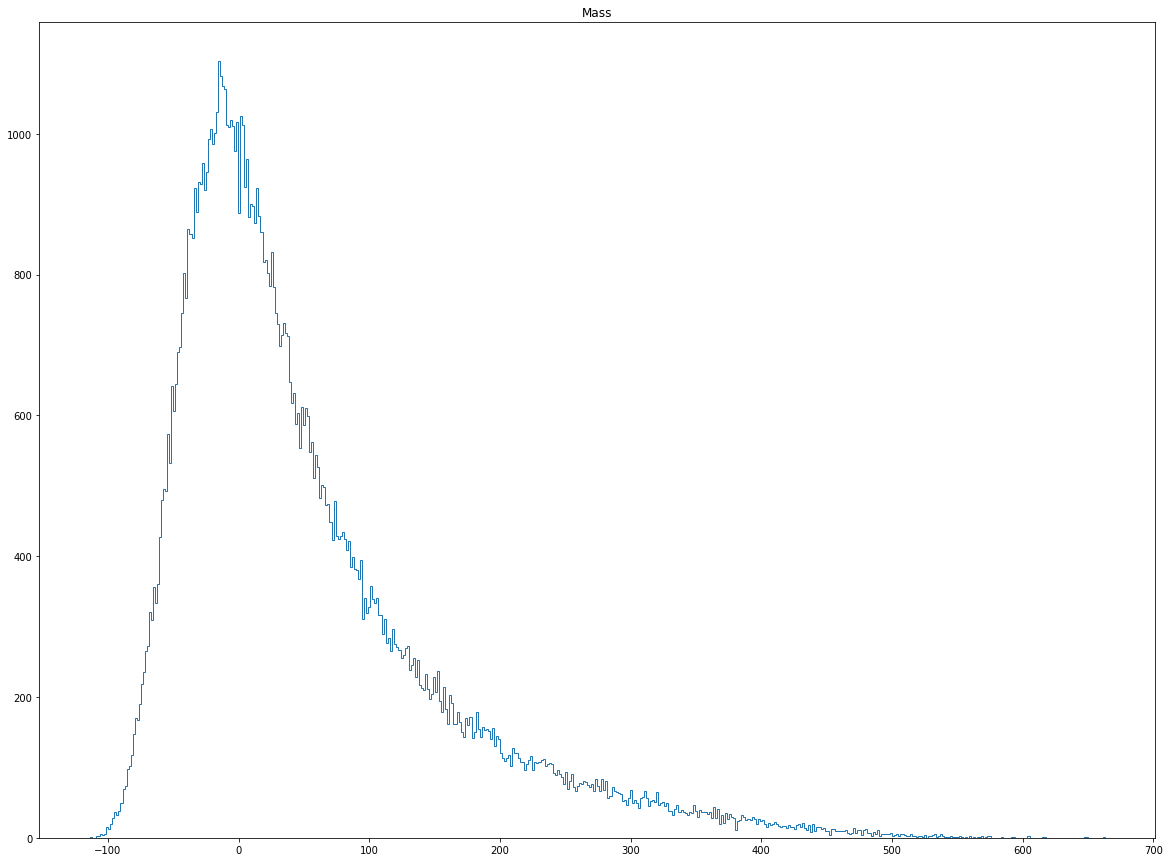

In [33]:
x= data1['mass']-data2['mass']
plt.hist(x, 500, histtype="step", stacked=True, fill=False)
plt.title("Mass")

probability = stats.norm.sf(5)
target_signal = stats.poisson.isf(probability, x)
print("Jets needed for 5 sigma discovery:", target_signal)

probability = stats.poisson.sf(target_signal, lam)
sigma = stats.norm.isf(probability)
print("Sigma corresponding to", target_signal, ":" , sigma)

#### 3. Make two sets of stacked histogram plots for the rest of the features
Set A without any event selection

Can you identify another feature as discriminative as mass? (i.e. equal or better significance after feature cut)

Set B with your optimal mass cuts

Can you identify another feature to further improve your expected signifiance?

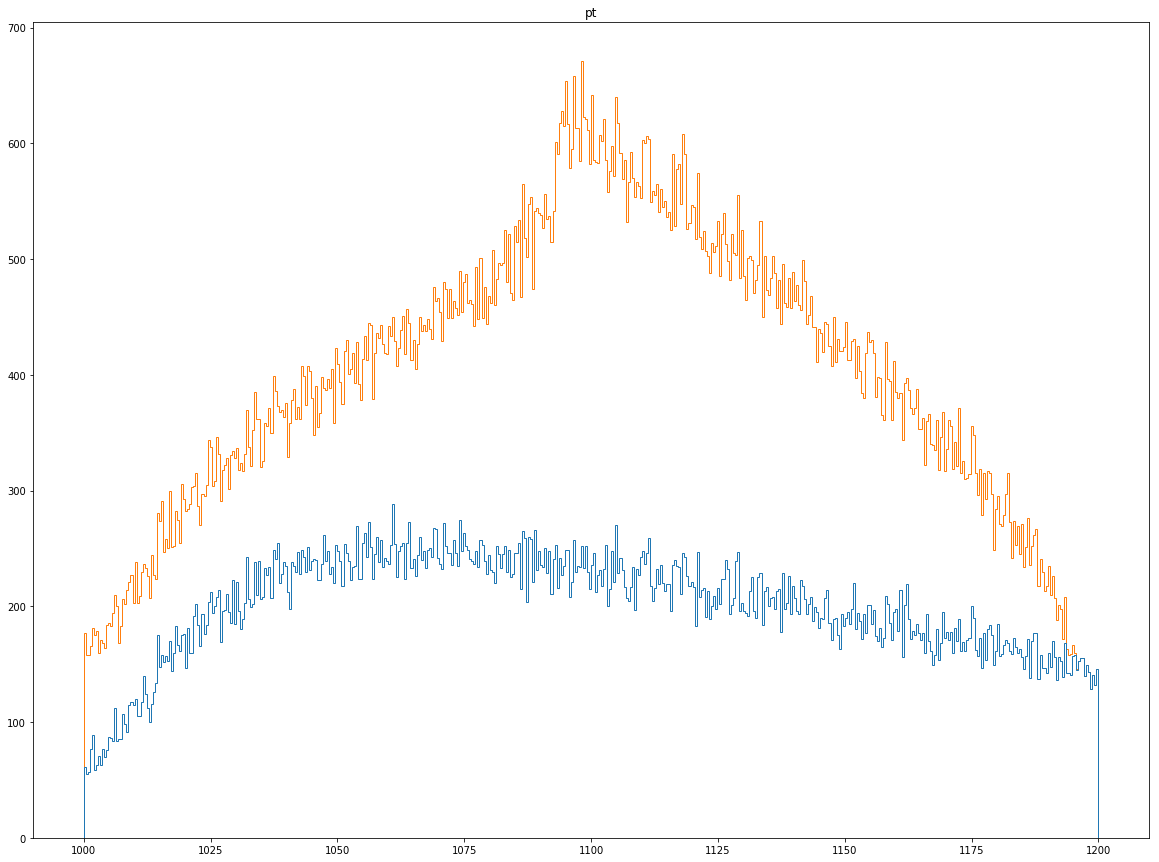

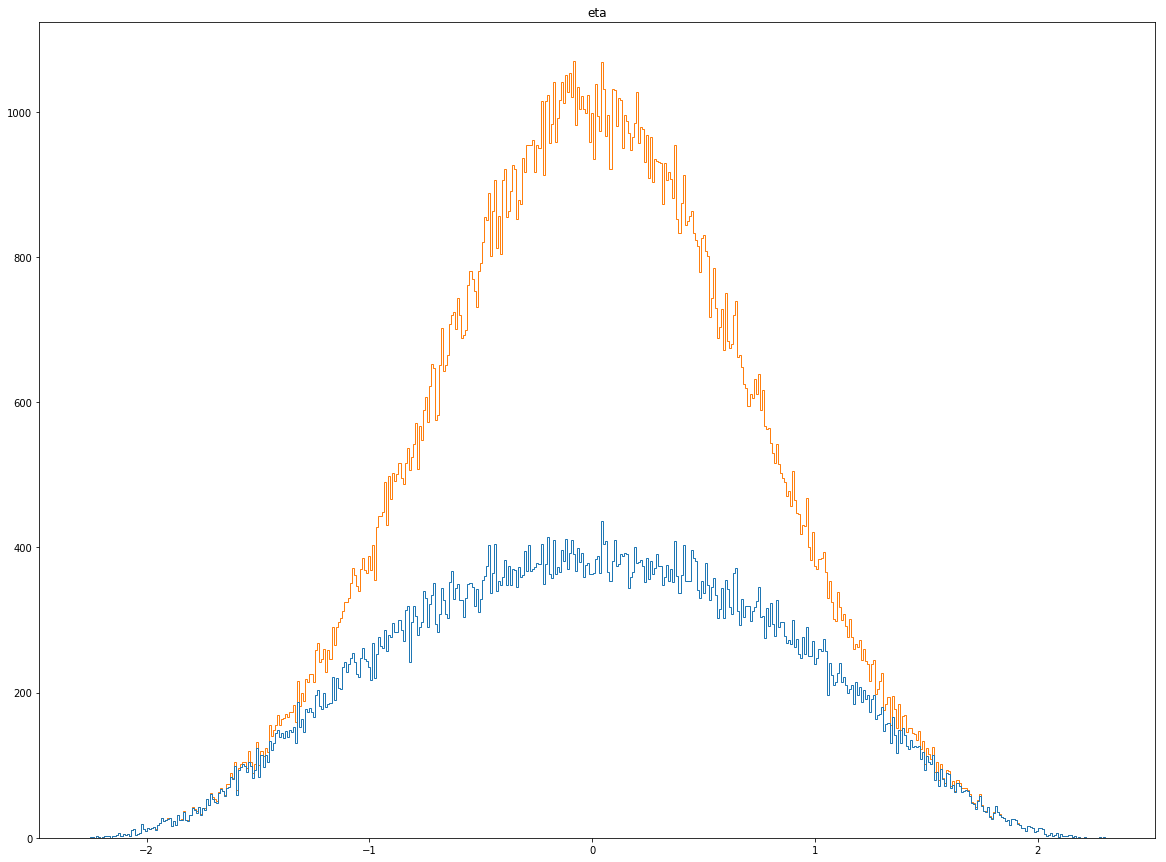

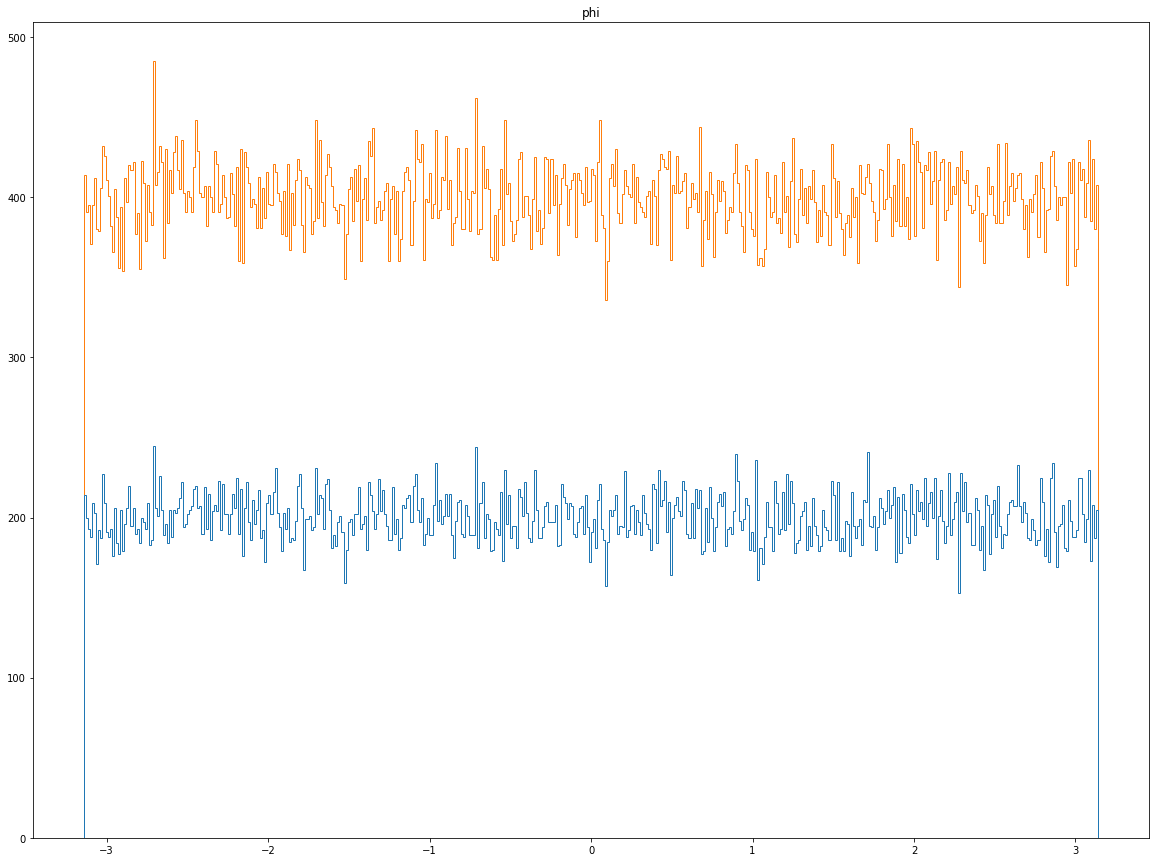

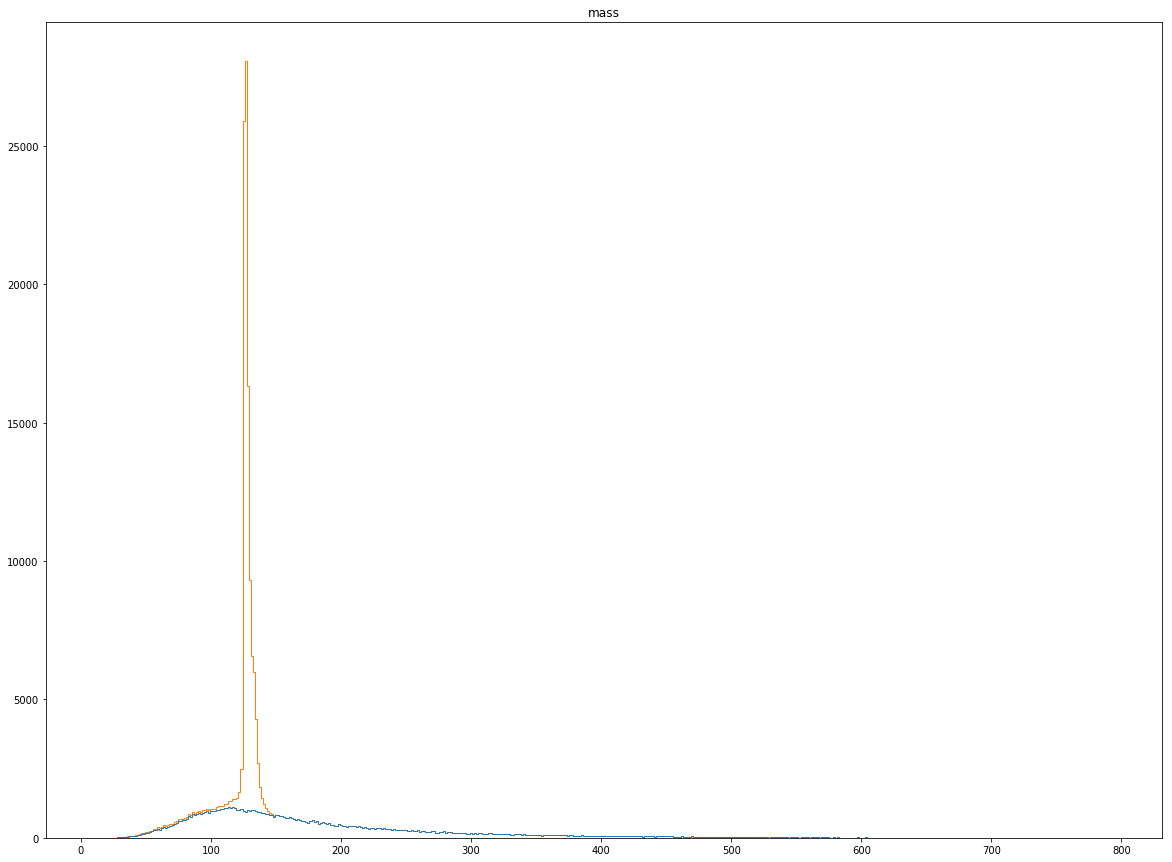

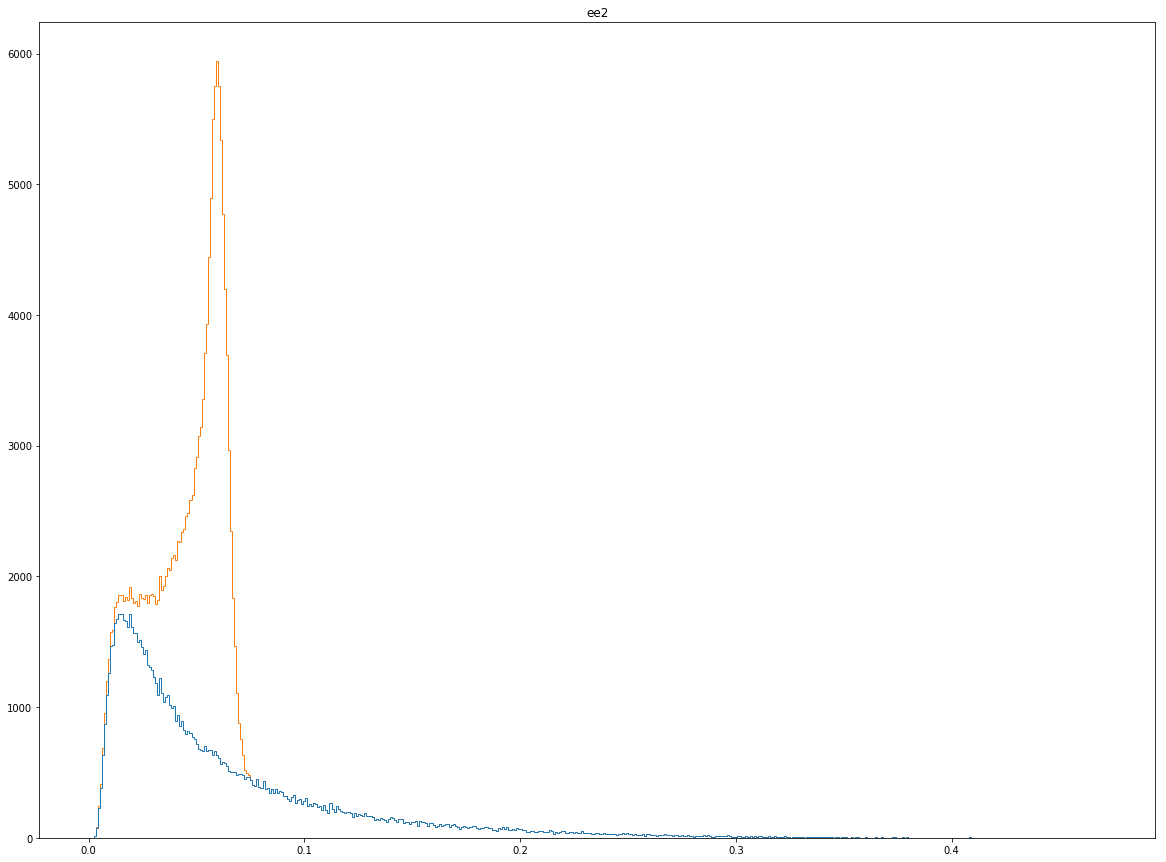

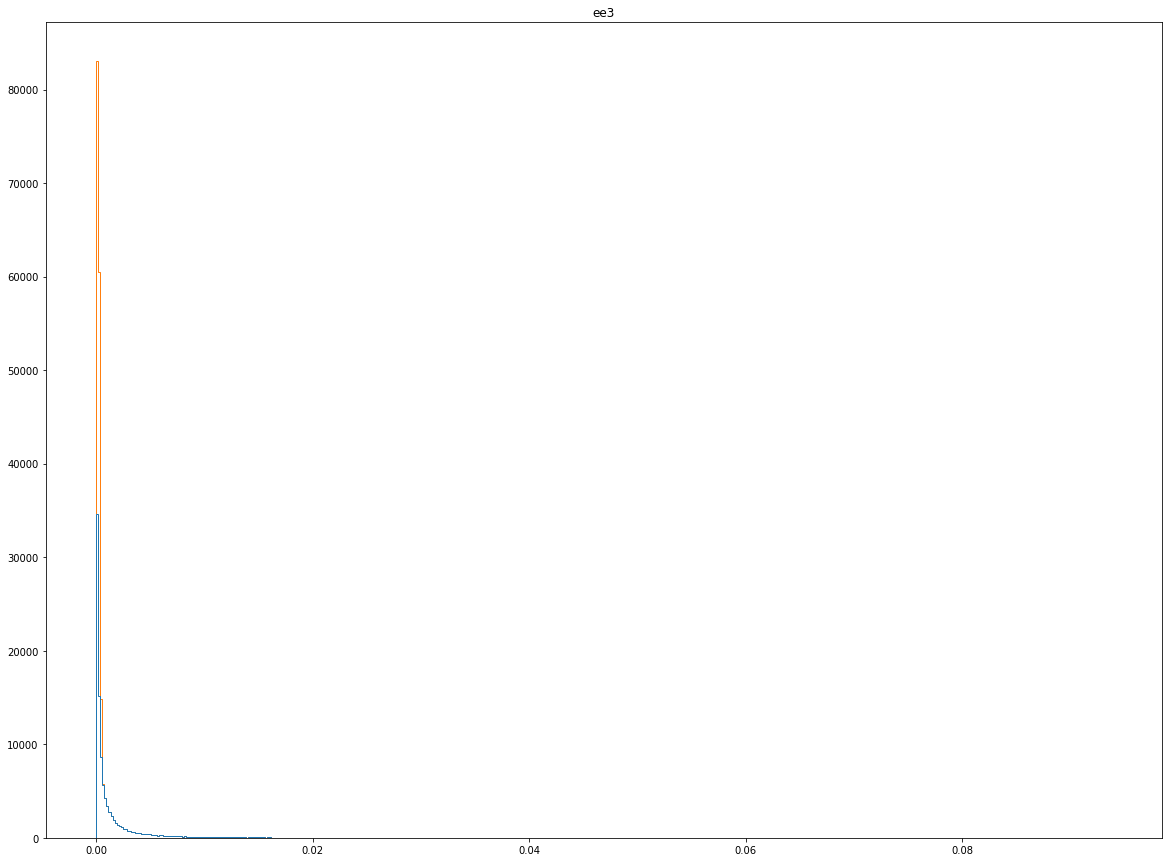

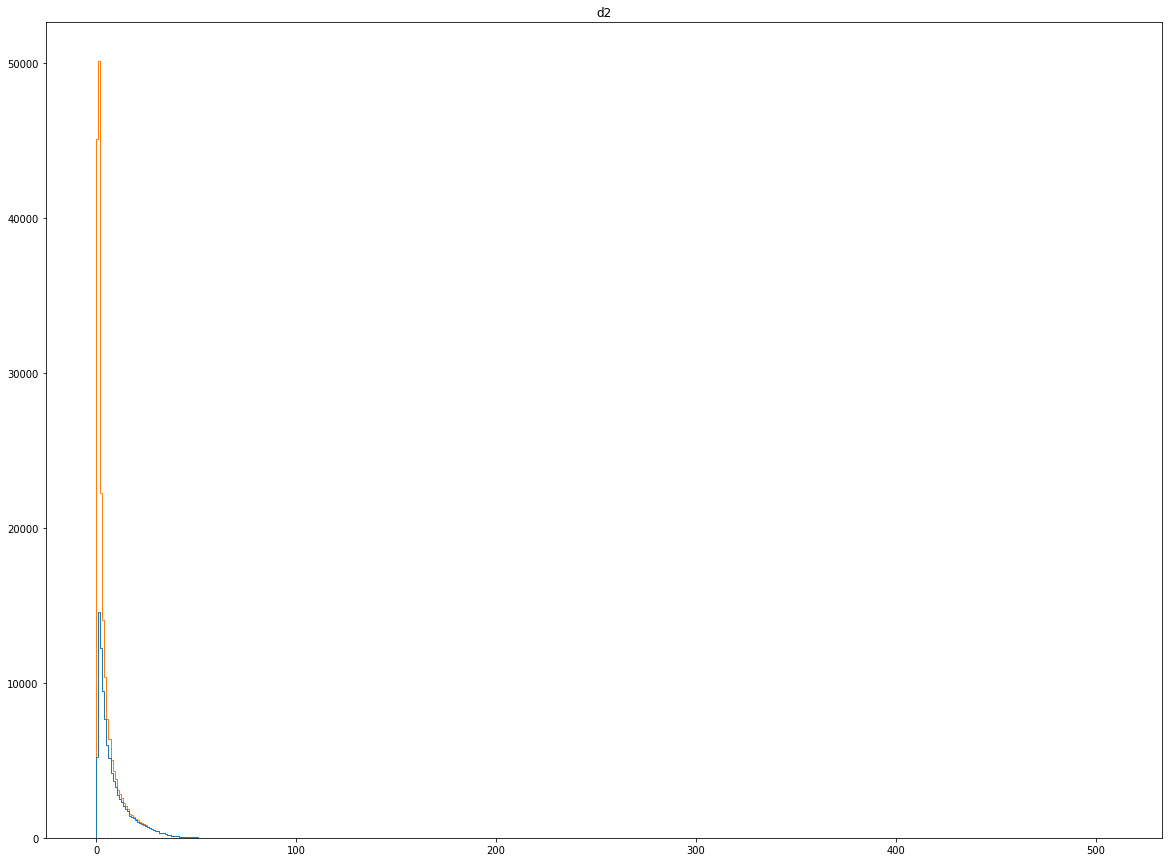

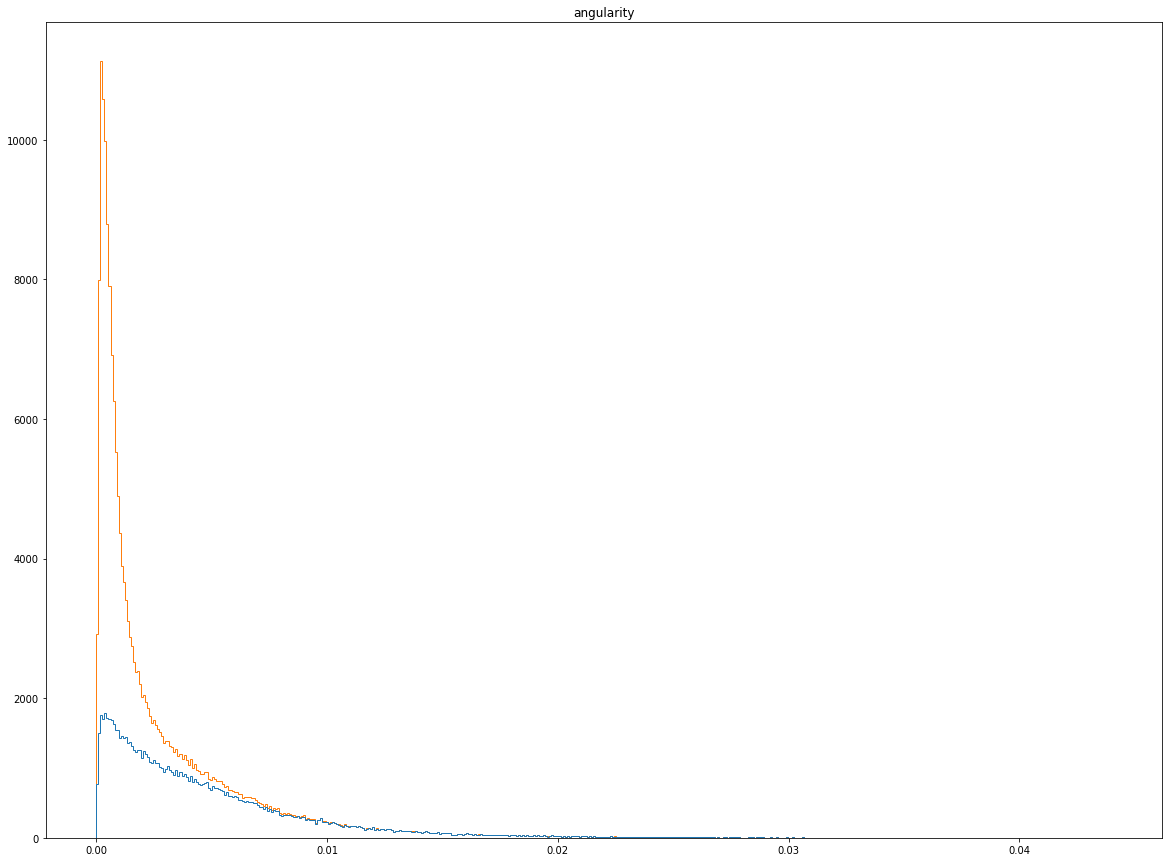

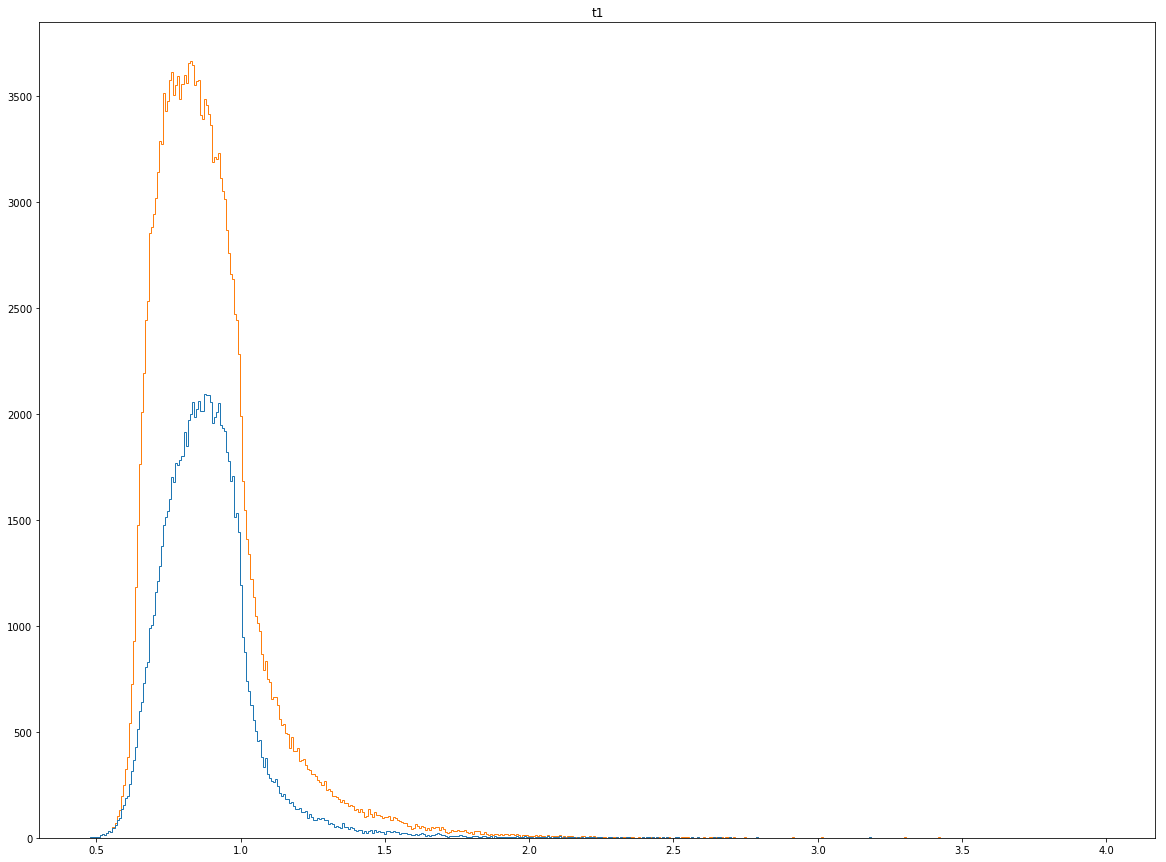

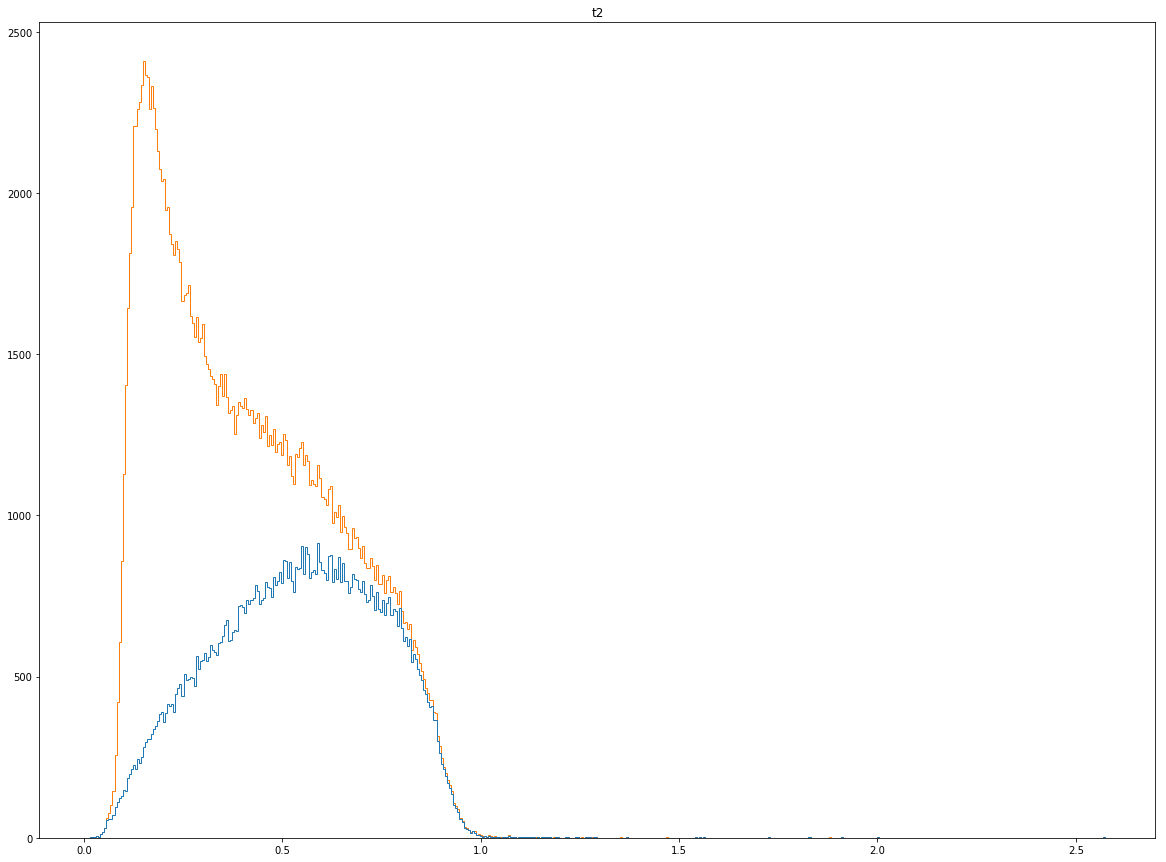

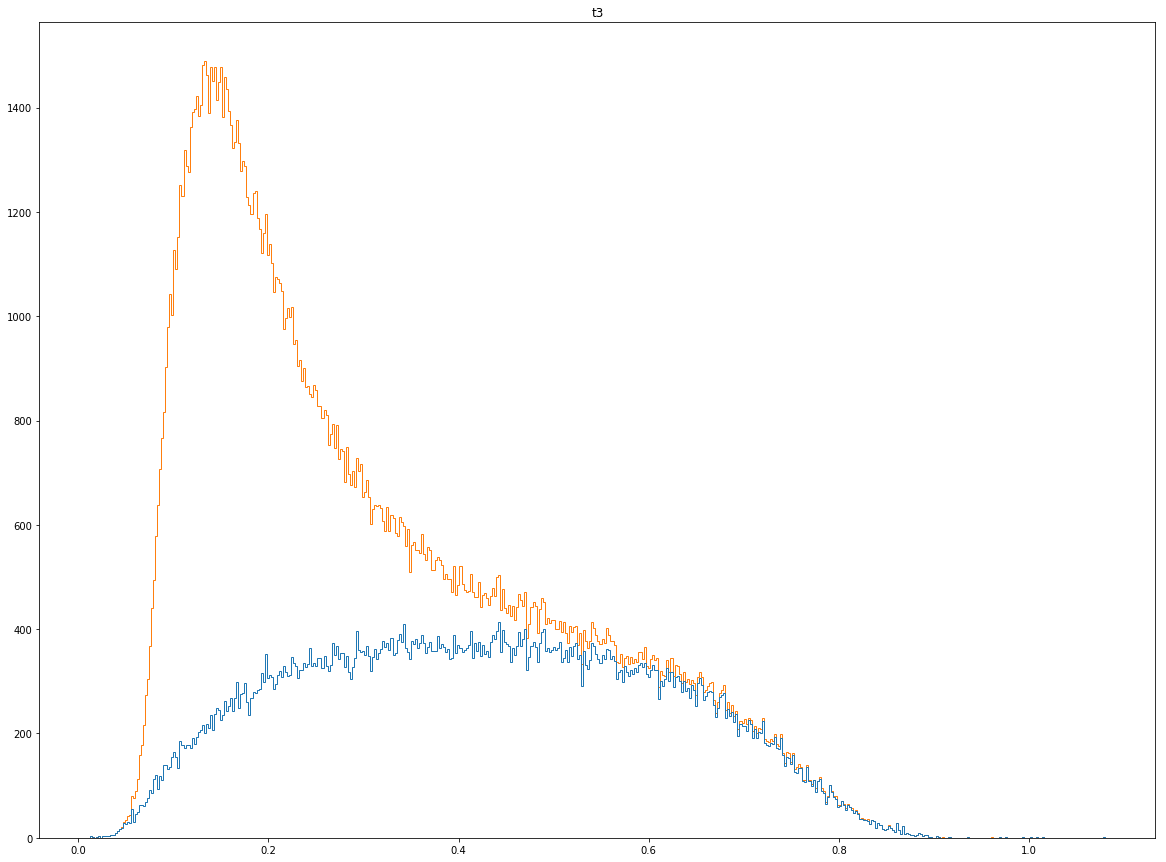

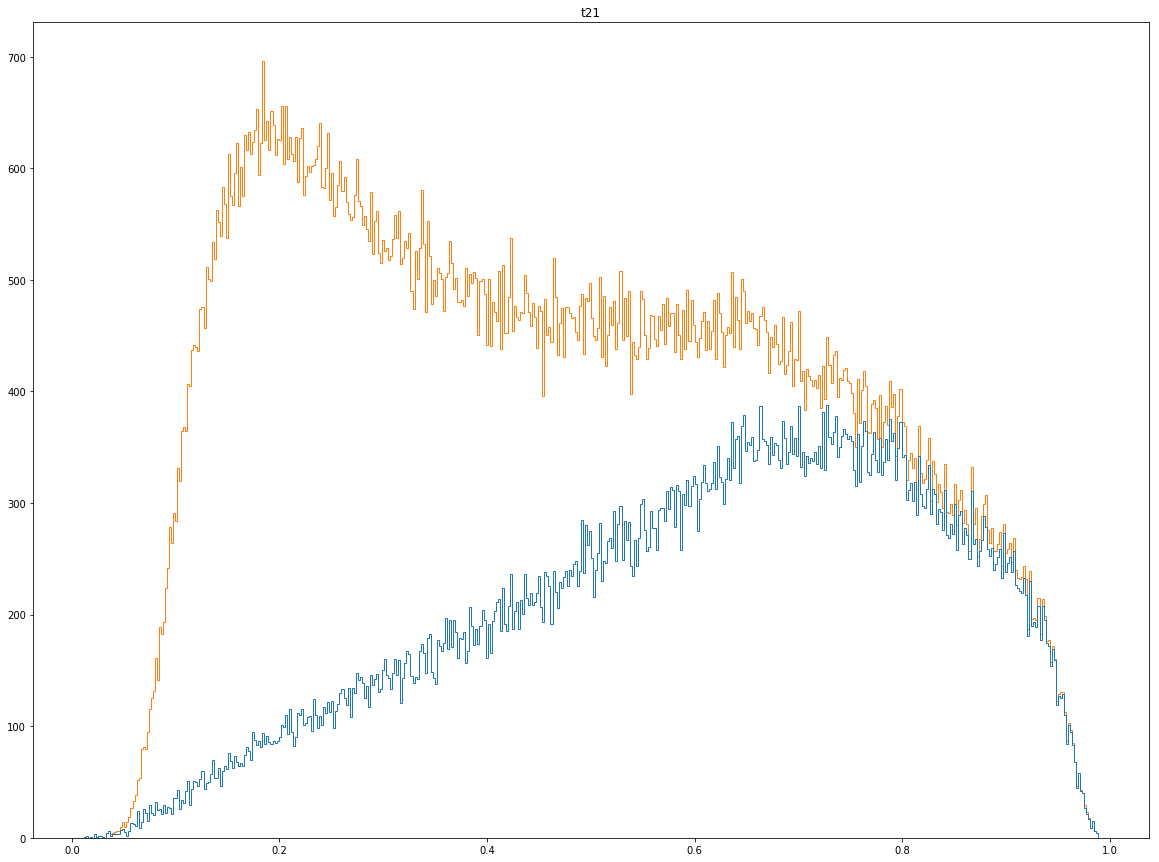

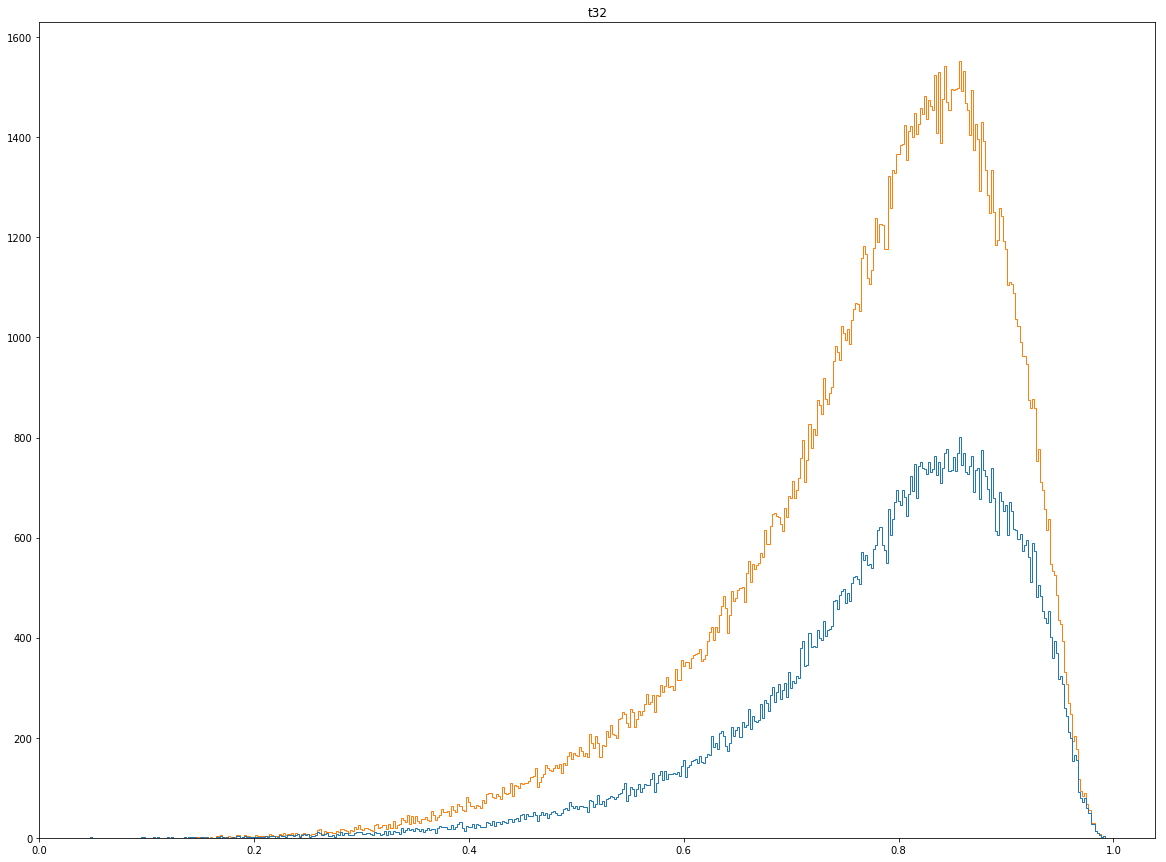

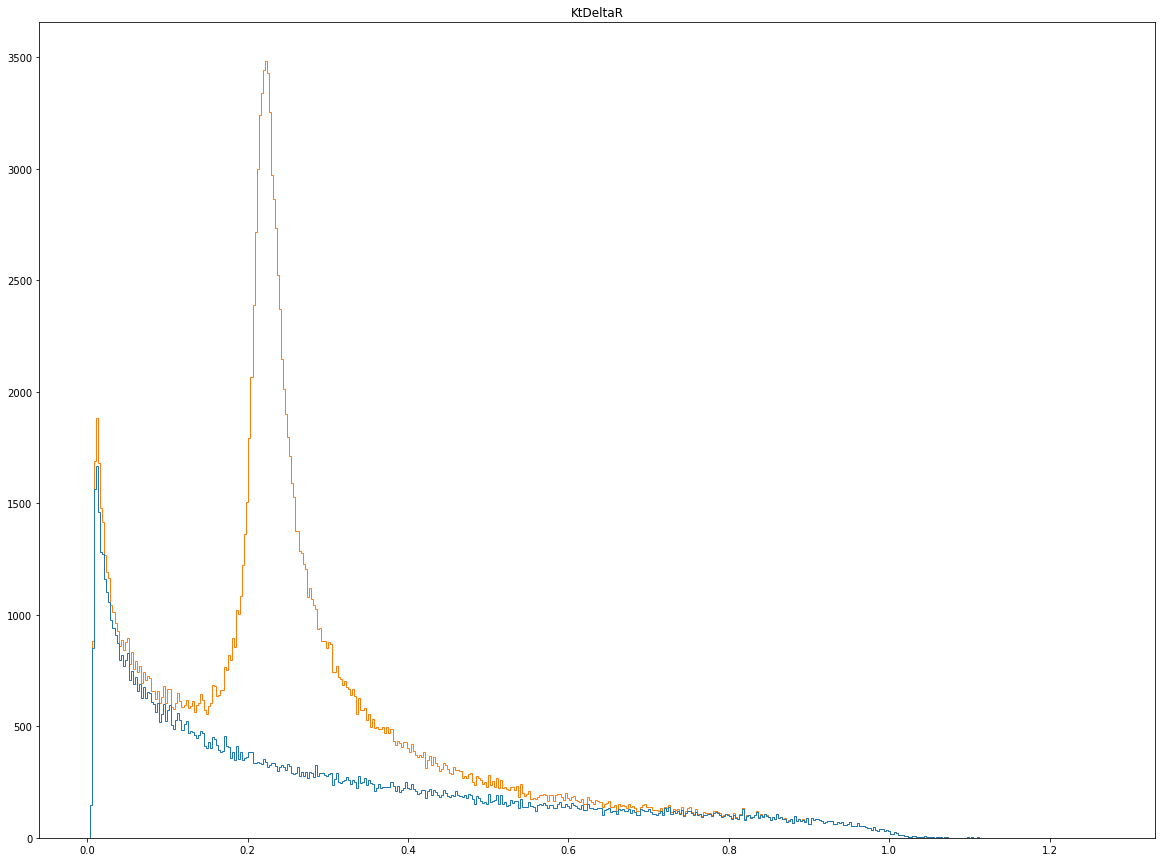

In [19]:
def plotWithoutCuts(key):
    x= [data1[key], data2[key]]
    plt.hist(x, 500, histtype="step", stacked=True, fill=False)
    plt.title(key)
    plt.show()

for key in data1.keys():
    plotWithoutCuts(key)

#### 4. Optimize event selections using multiple features (if necessary)
Find a set of feature cuts which achieve high expected significance.

Compare significance (before/after event selection) derived in your pT samples to your lab partner. Describe your findings.

#### 5. Plot 2-dimensional plots using the top two most discriminative features
Can you find a curve or a linear combination in this 2D plane which gives even better sensitivity?